In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots

In [46]:
format_plots()

In [56]:
colors = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c']
cml = sns.blend_palette(colors, n_colors=256, as_cmap=True)

In [48]:
def KLD_analysis(frequencies):
    '''rows are sessions (or mice/phases), columns are variables (syllables)'''
    cohort_dist=np.zeros((len(frequencies),len(frequencies)),dtype=float)
    x=0
    y=0
    for i in frequencies:
        for j in frequencies:
            cohort_dist[x,y]=scipy.spatial.distance.jensenshannon(p=np.array(i), q=np.array(j))
            
            y=y+1
        y=0
        x=x+1
    return cohort_dist

def plot_KLD(cohort_dist,age_labels,vmin=0.1,vmax=0.1,title='distance'):
    # cohort_dist is matrix of
    seqmatcolor='cubehelix'
    cmg=sns.clustermap(cohort_dist,cmap=seqmatcolor,
                       xticklabels=1,
                       yticklabels=1,
                   colors_ratio=0.2,cbar_pos=(1.05, 0.045, 0.03, 0.75),
                   col_cluster=False,row_cluster=False,
                   method='average',metric='sqeuclidean', vmin=vmin,vmax=vmax)
    cmg.fig.set_size_inches(6,6)
    ax = cmg.ax_heatmap
    ax.set_xticklabels(age_labels, fontsize=6)
    ax.set_yticklabels(age_labels)
    ax.set_title(title,fontsize=14)
    plt.show()

In [49]:
version = 7
folder = Path(f'/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}')

In [50]:
def load_long_df(version=7):
    usage_mtx = pd.read_parquet(
        f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}/longtogeny_males_clean.parquet"
    )
    return usage_mtx

In [51]:
df = pd.read_parquet(folder / "longtogeny_males_clean_pseudotime_v2.parquet")
df.set_index(['pseudo_age', 'pseudo_age_smooth'], append=True, inplace=True)
keep_sylls = df.columns[df.median() > 0.005]
df = df[keep_sylls]

index = ['age', 'mouse', 'cage', 'uuid', 'subject_name', 'date', 'pseudo_age', 'pseudo_age_smooth']

In [52]:
index = ['binned_age'] + index
ages = df.index.get_level_values('pseudo_age_smooth')
lbls, bins = pd.qcut(ages, 15, labels=False, retbins=True)

df['binned_age'] = lbls
df = df.reset_index().set_index(index)
binned_ages = df.groupby(['binned_age', 'mouse', 'cage']).mean()
binned_ages = df.groupby(['pseudo_age_smooth', 'mouse', 'cage']).mean()

In [53]:
data = binned_ages.copy()
data_labels = data.index.get_level_values(0).to_numpy()

In [54]:
kld = KLD_analysis(data.to_numpy())
#plot_KLD(kld,data.index.get_level_values(0),0.6)

In [57]:
#colors for plotting
cmap2 = cml
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='cubehelix'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

<Figure size 1200x1200 with 0 Axes>

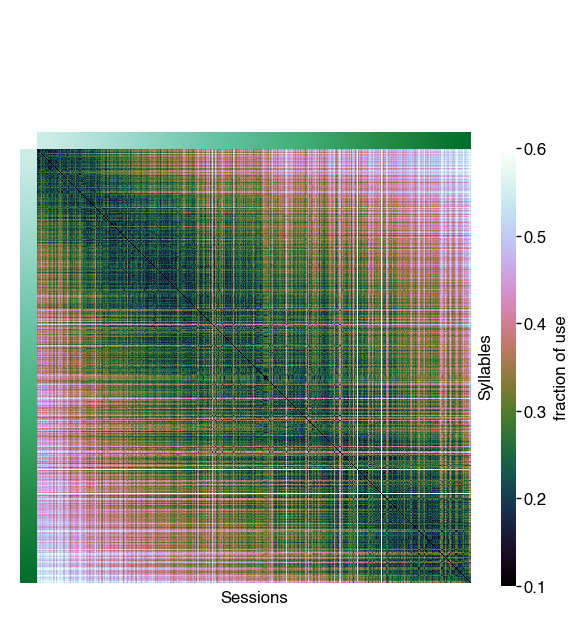

In [58]:
# plot syllable usage acoss time points
cg=sns.clustermap(
    data=kld,
    cmap=seqmatcolor, 
    figsize=(3, 3),
    col_colors=color_mat,
    row_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    method='average',
    metric='jensenshannon',
    #cbar_kws={'label': 'fraction of use'}, 
    vmin=0.1,
    vmax=0.6)
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Syllables')
plt.show()

In [60]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig5"/ 'dist_psd_jsd.pdf', bbox_inches='tight')

In [59]:
data_labels

array([ 3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.00221652,  3.00221652,  3.00235409,
        3.00316861,  3.00443305,  3.00443305,  3.00667918,  3.01108262,
        3.01108262,  3.01551567,  3.02700279,  3.02712303,  3.02867874,
        3.03808541,  3.05622211,  3.05622211,  3.08037182,  3.08987447,
        3.12323464,  3.12378338,  3.12531064,  3.12766769,  3.14166353,
        3.14166353,  3.20896826,  3.23096098,  3.23096098,  3.26711469,
        3.26903902,  3.27568859,  3.28059931,  3.28496656,  3.2880912 ,
        3.30047486,  3.31820705,  3.32547635,  3.37636086,  3.42026534,
        3.48339424,  3.4887977 ,  3.52256974,  3.52671797,  3.52700279,
        3.53365236,  3.54029457,  3.54472761,  3.54514957,  3.56286554,
        3.57045881,  3.60235724,  3.61215939,  3.61265881,  3.61